<a href="https://colab.research.google.com/github/ardhiapp26/Tubes_KecerdasanBuatan/blob/main/TUBES_KecerdasanBuatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

train_dir = "/content/gdrive/MyDrive/Data Set/Train"
vald_dir = "/content/gdrive/MyDrive/Data Set/Validation"

nangka_train_path = train_dir + "/Nangka"
sirih_train_path = train_dir + "/Sirih"

nangka_vald_path = vald_dir + "/Nangka"
sirih_vald_path = vald_dir + "/Sirih"

len_nangka_train = len(os.listdir(nangka_train_path))
len_sirih_train = len(os.listdir(sirih_train_path))
len_nangka_vald = len(os.listdir(nangka_vald_path))
len_sirih_vald = len(os.listdir(sirih_vald_path))

print("Panjang Dataset Training : ", len_nangka_train + len_sirih_train)
print("Panjang Dataset Validation : ", len_nangka_vald + len_sirih_vald)

print("\n")

print("Panjang Data Train Nangka : ", len_nangka_train)
print("Panjang Data Train Sirih : ", len_sirih_train)
print("Panjang Data Validation Nangka : ", len_nangka_vald)
print("Panjang Data Validation Sirih : ", len_sirih_vald)

Panjang Dataset Training :  100
Panjang Dataset Validation :  6


Panjang Data Train Nangka :  50
Panjang Data Train Sirih :  50
Panjang Data Validation Nangka :  3
Panjang Data Validation Sirih :  3


In [ ]:
train_nangka_fnames = os.listdir(nangka_train_path)
train_sirih_fnames = os.listdir(sirih_train_path)

print(train_nangka_fnames[:7])
print(train_sirih_fnames[:7])

['048.jpg', '011.jpg', '014.jpg', '049.jpg', '015.jpg', '012.jpg', '013.jpg']
['050.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mping

nrows = 5
ncols = 5

pic_index = 0

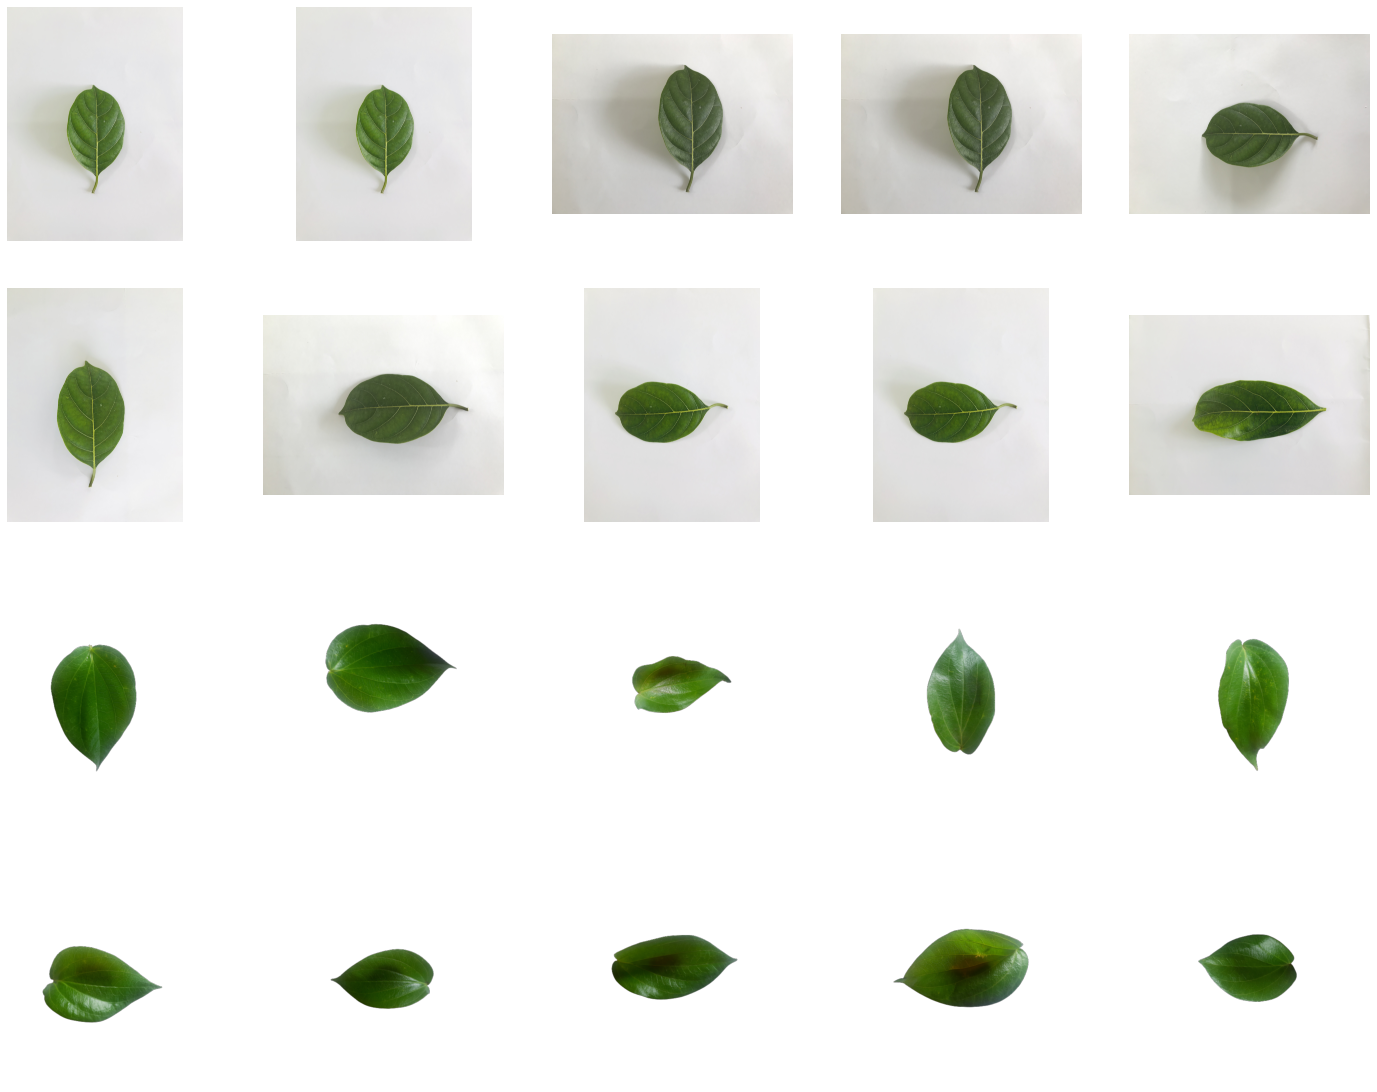

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*5, nrows*5)

pic_index += 10

next_nangka_pix = [os.path.join(nangka_train_path, fname)
for fname in train_nangka_fnames[pic_index-10:pic_index]
]

next_sirih_pix = [os.path.join(sirih_train_path, fname)
for fname in train_sirih_fnames[pic_index-10:pic_index]
]

for i, img_path in enumerate(next_nangka_pix + next_sirih_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mping.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode = ('nearest'),
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.2
)
vald_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=4,
        class_mode='binary',
        target_size=(125, 125)
)

validation_generator = vald_datagen.flow_from_directory(
        vald_dir,
        batch_size=4,
        class_mode='binary',
        target_size=(125, 125)
)


Found 100 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end (self,epoch,logs = {}):
    if(logs.get('accuracy') > 0.97):
      print("\n Akurasi mencapai > 97%")
      self.model.stop_training = True 

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 128)     

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy'])

In [ ]:
history = model.fit( 
    train_generator,
    steps_per_epoch=8,
    epochs = 100,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=2,
    callbacks = [callbacks]
    )

Epoch 1/100
8/8 - 5s - loss: 0.5024 - accuracy: 0.7500 - val_loss: 1.5321 - val_accuracy: 0.5000 - 5s/epoch - 658ms/step
Epoch 2/100
8/8 - 3s - loss: 0.5532 - accuracy: 0.9062 - 3s/epoch - 335ms/step
Epoch 3/100
8/8 - 2s - loss: 0.2392 - accuracy: 0.9688 - 2s/epoch - 288ms/step
Epoch 4/100
8/8 - 3s - loss: 0.1718 - accuracy: 0.9688 - 3s/epoch - 389ms/step
Epoch 5/100

 Akurasi mencapai > 97%
8/8 - 2s - loss: 0.0274 - accuracy: 1.0000 - 2s/epoch - 290ms/step


Text(0.5, 1.0, 'Training and Validation Loss')

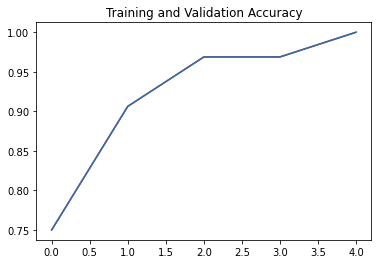

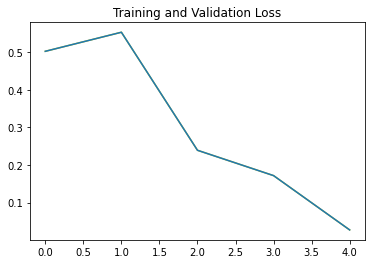

In [ ]:
acc = history.history['accuracy']
vald_acc = history.history['val_accuracy']
loss = history.history['loss']
vald_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot (epochs, acc)
plt.title("Training and Validation Accuracy")
plt.figure()

plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, loss)
plt.title("Training and Validation Loss")

Saving 018.jpg to 018.jpg
018.jpg
Daun Nangka


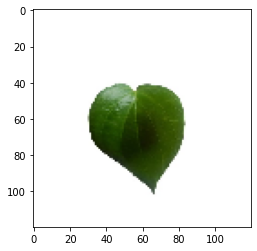

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(120,120))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)

  print (fn)
  if classes==0:
      print('Daun Nangka')
  else :
      print('Daun Sirih')
